Ejemplo 2
=======

Ejemplo que muestra el uso de multiobjetivo para lograr caminos y decisiones optimas.

In [1]:
import contextlib
import functools
import matplotlib.pyplot as plt
import os

import networkx as nx

import bcnetwork as bc

## Especificacion de los datos

La instancia esta compuesta por un grafo y dos pares origen destino. Lo que se quiere demostrar es cómo construiyendo infrastructuras en arcos donde no pasan, a prior, los caminos más cortos, se llega a la solución óptima.

In [2]:
nodes = [
    # node, x, y
    ('1', 0.5, 3),
    ('2', 2, 1.5),
    ('3', 3, 3),
    ('4', 4, 1.5),
    ('5', 5, 4),
    ('6', 6, 3),
]
arcs = [
    # from, to, weight
    ('1', '2', 3),
    ('1', '3', 3),
    ('1', '5', 4),
    ('2', '3', 2),
    ('2', '4', 3),
    ('3', '2', 3),
    ('3', '4', 2),
    ('3', '5', 2),
    ('4', '5', 4),
    ('4', '6', 2),
    ('5', '4', 4),
    ('5', '6', 2),
]

graph = nx.DiGraph()

for n, x, y in nodes:
    graph.add_node(n, pos=(x, y))

for n1, n2, weight in arcs:
    # Set user_cost and construction_cost for infrastructure 1,
    # Values for base infrastructre are set automatically
    graph.add_edge(
        n1, n2,
        user_cost=weight,
        construction_cost=weight,
        user_cost_1=weight / 2,
    )

odpairs = [
    # origin, destination, demand
    ('1', '6', 10),
]

breakpoints = [
    # P, Q
    (0, 1), # There's 0 transfer if user cost is no lesser than 1 * best_base_path_cost
    (1, 0.75),
]

budget = 5
# Two infrastructures:
# base and the next level of improvement
infrastructure_count = 2

In [3]:
# Creates the model object
model = bc.model.Model(
    name='Ejemplo 2',
    graph=graph,
    infrastructure_count=infrastructure_count,
    budget=budget,
    odpairs=odpairs,
    breakpoints=breakpoints,
)
solution = model.solve(solver='glpsol')
solution_v2 = model.solve(solver='glpsol', model_name='single_level_v4')

## Flujos

In [4]:
fig_dir = '../thesis/resources'

get_fig_dir = functools.partial(os.path.join, fig_dir)

figsize = (5, 3)
figsize_2c = (10, 3)
draw = functools.partial(
    bc.draw.draw, model, odpair_scale_factor=3, odpairs_legend=False,
    odpair_separate=True, legend_location='upper left')

@contextlib.contextmanager
def save_fig(file_name, dpi=None, **fig_kw):
    fig, ax = plt.subplots(**fig_kw)
    yield ax
    fig.savefig(file_name, dpi=dpi)

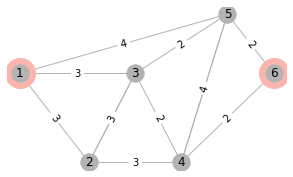

In [5]:
with save_fig(get_fig_dir('example_2_base.png')) as ax:
    draw(with_labels=True, edge_weight_label='user_cost', ax=ax, figsize=figsize)

## Infrastructuras

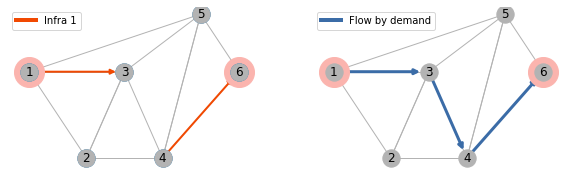

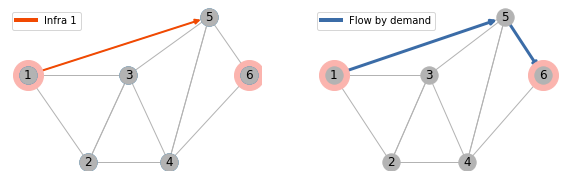

In [6]:
with save_fig(get_fig_dir('example_2_sol_v2.png'), ncols=2) as axs:
    ax1, ax2 = axs
    draw(solution=solution_v2, flows=False, infrastructures=True, ax=ax1, figsize=figsize_2c)
    draw(solution=solution_v2, flows=True, infrastructures=False, ax=ax2, figsize=figsize_2c)

with save_fig(get_fig_dir('example_2_sol_v1.png'), ncols=2) as axs:
    ax1, ax2 = axs
    draw(solution=solution, flows=False, infrastructures=True, ax=ax1, figsize=figsize_2c)
    draw(solution=solution, flows=True, infrastructures=False, ax=ax2, figsize=figsize_2c)

In [7]:
solution_v2.data

{'shortest_paths': [{'origin': '1',
   'destination': '6',
   'shortest_path_cost': 4.5}],
 'flows': [{'origin': '1',
   'destination': '6',
   'arc': 'arc_1_3',
   'infrastructure': 1,
   'flow': 1},
  {'origin': '1',
   'destination': '6',
   'arc': 'arc_3_4',
   'infrastructure': 0,
   'flow': 1},
  {'origin': '1',
   'destination': '6',
   'arc': 'arc_4_6',
   'infrastructure': 1,
   'flow': 1}],
 'infrastructures': [{'arc': 'arc_1_3',
   'infrastructure': '1',
   'construction_cost': 3.0},
  {'arc': 'arc_4_6', 'infrastructure': '1', 'construction_cost': 2.0}],
 'demand_transfered': [{'origin': '1',
   'destination': '6',
   'demand_transfered': 10,
   'z': 1,
   'j_value': 1}],
 'total_demand_transfered': [{'total_demand_transfered': 10}],
 'budget_used': [{'budget_used': 5}]}